Daily Challenge : Advanced Data Analysis And Problem Solving With SciPy And NumPy

In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration (with some noise)

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})


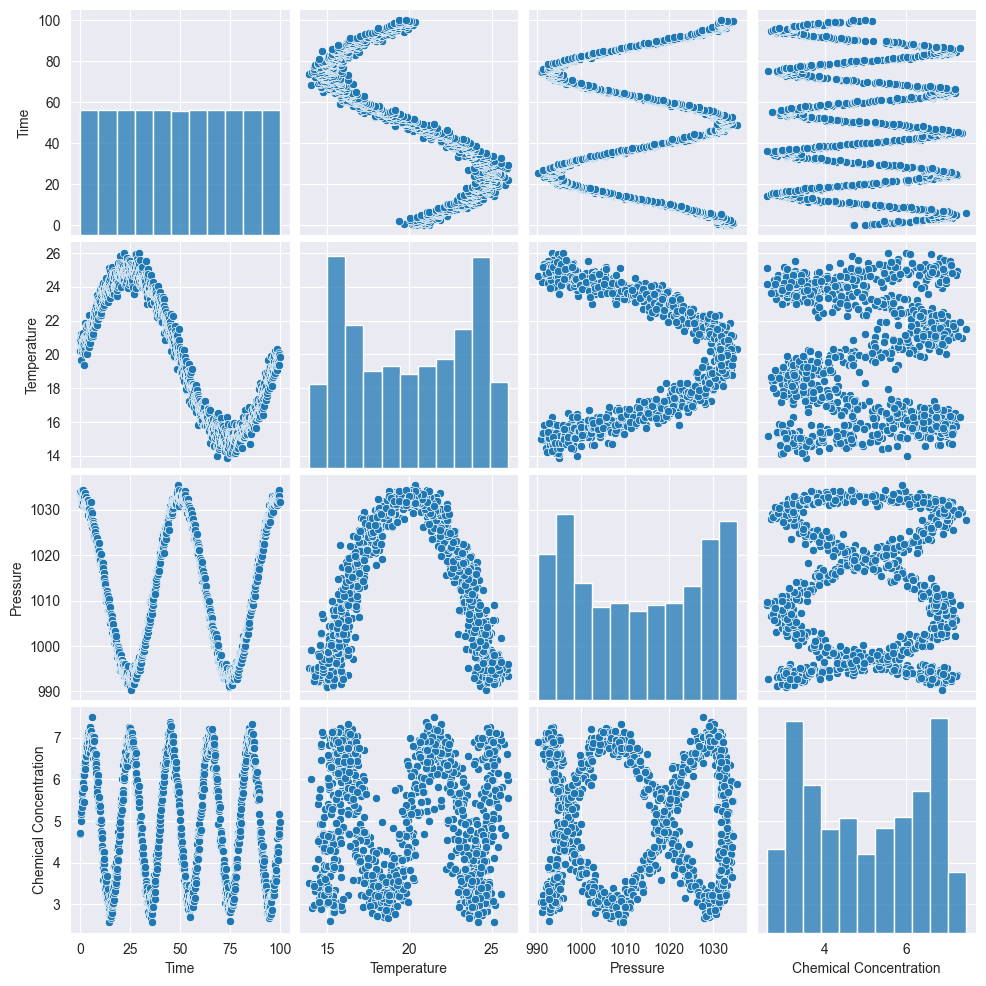

In [2]:
import seaborn as sns

sns.pairplot(data=ninja_data)

In [3]:
ninja_data.head()

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754


In [4]:
# Compute mean and standard deviation of each variable
mean_temperature = np.mean(ninja_data['Temperature'])
std_temperature = np.std(ninja_data['Temperature'])

mean_pressure = np.mean(ninja_data['Pressure'])
std_pressure = np.std(ninja_data['Pressure'])

mean_concentration = np.mean(ninja_data['Chemical Concentration'])
std_concentration = np.std(ninja_data['Chemical Concentration'])

# Normalize each variable
normalized_temperature = (ninja_data['Temperature'] - mean_temperature) / std_temperature
normalized_pressure = (ninja_data['Pressure'] - mean_pressure) / std_pressure
normalized_concentration = (ninja_data['Chemical Concentration'] - mean_concentration) / std_concentration

# Update DataFrame with normalized values
ninja_data['Normalized Temperature'] = normalized_temperature
ninja_data['Normalized Pressure'] = normalized_pressure
ninja_data['Normalized Chemical Concentration'] = normalized_concentration

In [5]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration,Normalized Temperature,Normalized Pressure,Normalized Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1.000000e+03
mean,50.000000,19.977372,1013.033617,4.989754,1.136868e-16,0.000000,-4.121148e-16
std,28.910854,3.574943,14.203350,1.436505,1.000500e+00,1.000500,1.000500e+00
min,0.000000,13.897407,990.284418,2.559310,-1.701567e+00,-1.602480,-1.692762e+00
25%,25.000000,16.386984,998.852247,3.576024,-1.004823e+00,-0.998952,-9.846385e-01
50%,50.000000,20.008666,1012.950967,4.970976,8.758279e-03,-0.005822,-1.307840e-02
75%,75.000000,23.570373,1027.062114,6.398067,1.005554e+00,0.988184,9.808653e-01
max,100.000000,26.030294,1035.471676,7.486763,1.693999e+00,1.580563,1.739122e+00


In [6]:
correlation_matrix = ninja_data.corr()
correlation_matrix

,Time,Temperature,Pressure,Chemical Concentration,Normalized Temperature,Normalized Pressure,Normalized Chemical Concentration
Time,1.000000,-0.770696,-0.001946,-0.156113,-0.770696,-0.001946,-0.156113
Temperature,-0.770696,1.000000,0.007112,-0.003277,1.000000,0.007112,-0.003277
Pressure,-0.001946,0.007112,1.000000,-0.000863,0.007112,1.000000,-0.000863
Chemical Concentration,-0.156113,-0.003277,-0.000863,1.000000,-0.003277,-0.000863,1.000000
Normalized Temperature,-0.770696,1.000000,0.007112,-0.003277,1.000000,0.007112,-0.003277
Normalized Pressure,-0.001946,0.007112,1.000000,-0.000863,0.007112,1.000000,-0.000863
Normalized Chemical Concentration,-0.156113,-0.003277,-0.000863,1.000000,-0.003277,-0.000863,1.000000


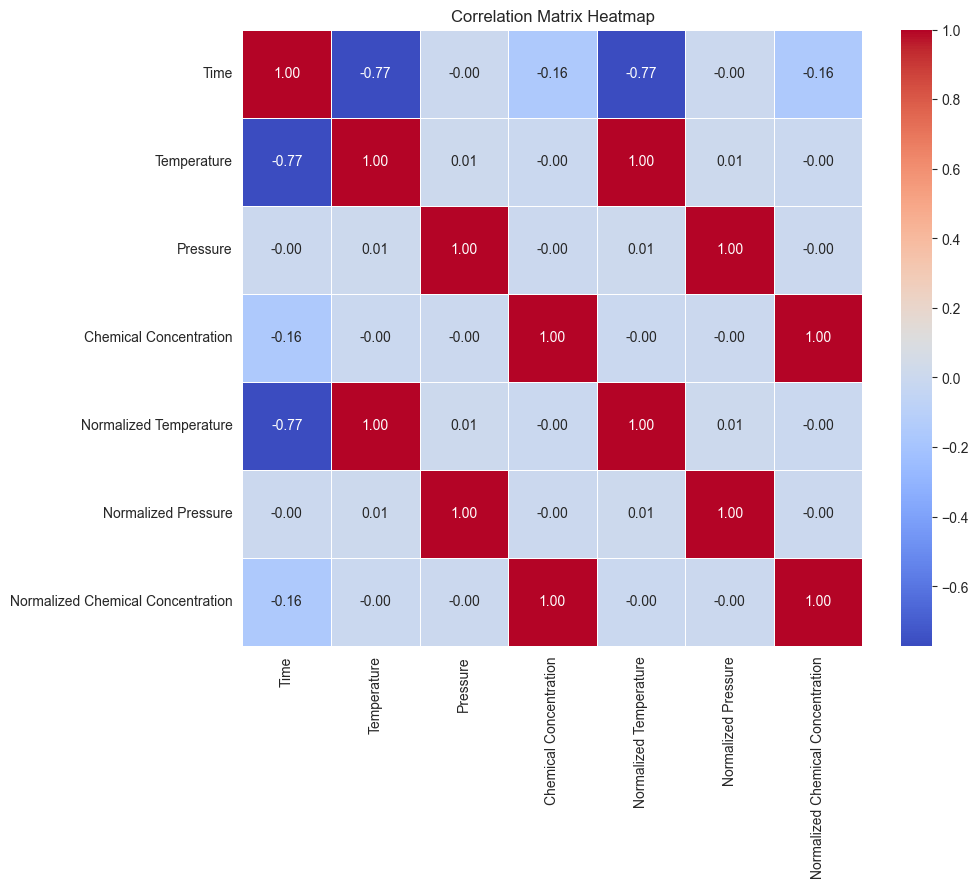

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [8]:
import scipy.stats as stats
temperature = ninja_data['Temperature']
chemical_concentration = ninja_data['Chemical Concentration']
correlation, p_value = stats.pearsonr(temperature, chemical_concentration)
print("\nCorrelation between Temperature and Chemical Concentration:", correlation)
print("p-value:", p_value)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation between Temperature and Chemical Concentration: -0.0032770701660484007
p-value: 0.9175655752792319
The correlation is not statistically significant.


In [9]:
import scipy.stats as stats
time = ninja_data['Time']
chemical_concentration = ninja_data['Chemical Concentration']
correlation, p_value = stats.pearsonr(time, chemical_concentration)
print("\nCorrelation between Time and Chemical Concentration:", correlation)
print("p-value:", p_value)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation between Time and Chemical Concentration: -0.15611269399824584
p-value: 7.013519043094809e-07
The correlation is statistically significant.


In [10]:
import scipy.stats as stats
time = ninja_data['Time']
temperature = ninja_data['Temperature']
correlation, p_value = stats.pearsonr(time, temperature)
print("\nCorrelation between Time and Temperature:", correlation)
print("p-value:", p_value)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation between Time and Temperature: -0.7706960694253793
p-value: 1.5285940870477973e-197
The correlation is statistically significant.


In [11]:
import scipy.stats as stats
time = ninja_data['Time']
pressure = ninja_data['Pressure']
correlation, p_value = stats.pearsonr(time, pressure)
print("\nCorrelation between Time and Pressure:", correlation)
print("p-value:", p_value)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation between Time and Pressure: -0.0019462968803657557
p-value: 0.9509845941636967
The correlation is not statistically significant.


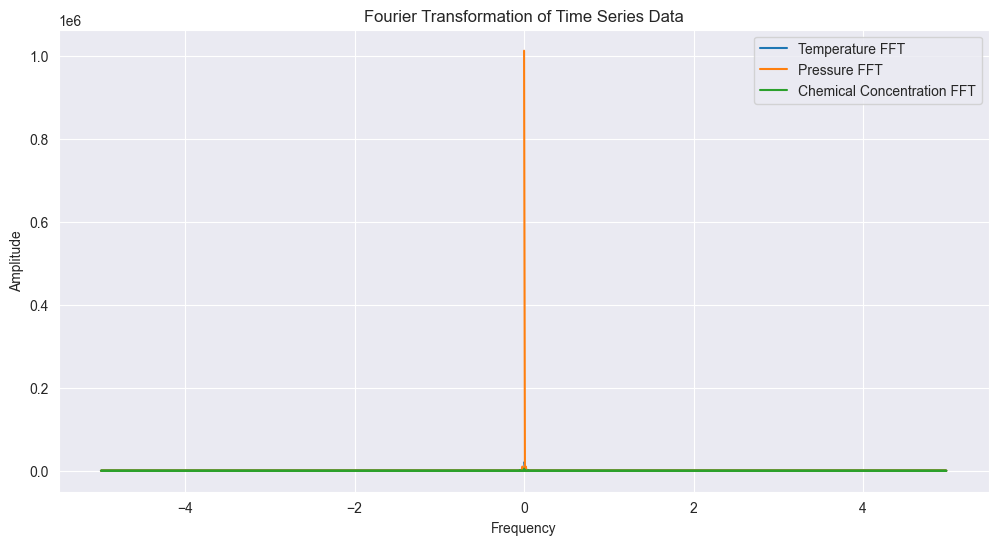

In [12]:
# Apply Fourier transformation to the time series data
temperature_fft = np.fft.fft(ninja_data['Temperature'])
pressure_fft = np.fft.fft(ninja_data['Pressure'])
chemical_concentration_fft = np.fft.fft(ninja_data['Chemical Concentration'])

# Frequency components
freq = np.fft.fftfreq(len(time), d=time[1]-time[0])

# Plotting the Fourier transformation
plt.figure(figsize=(12, 6))
plt.plot(freq, np.abs(temperature_fft), label='Temperature FFT')
plt.plot(freq, np.abs(pressure_fft), label='Pressure FFT')
plt.plot(freq, np.abs(chemical_concentration_fft), label='Chemical Concentration FFT')
plt.title('Fourier Transformation of Time Series Data')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


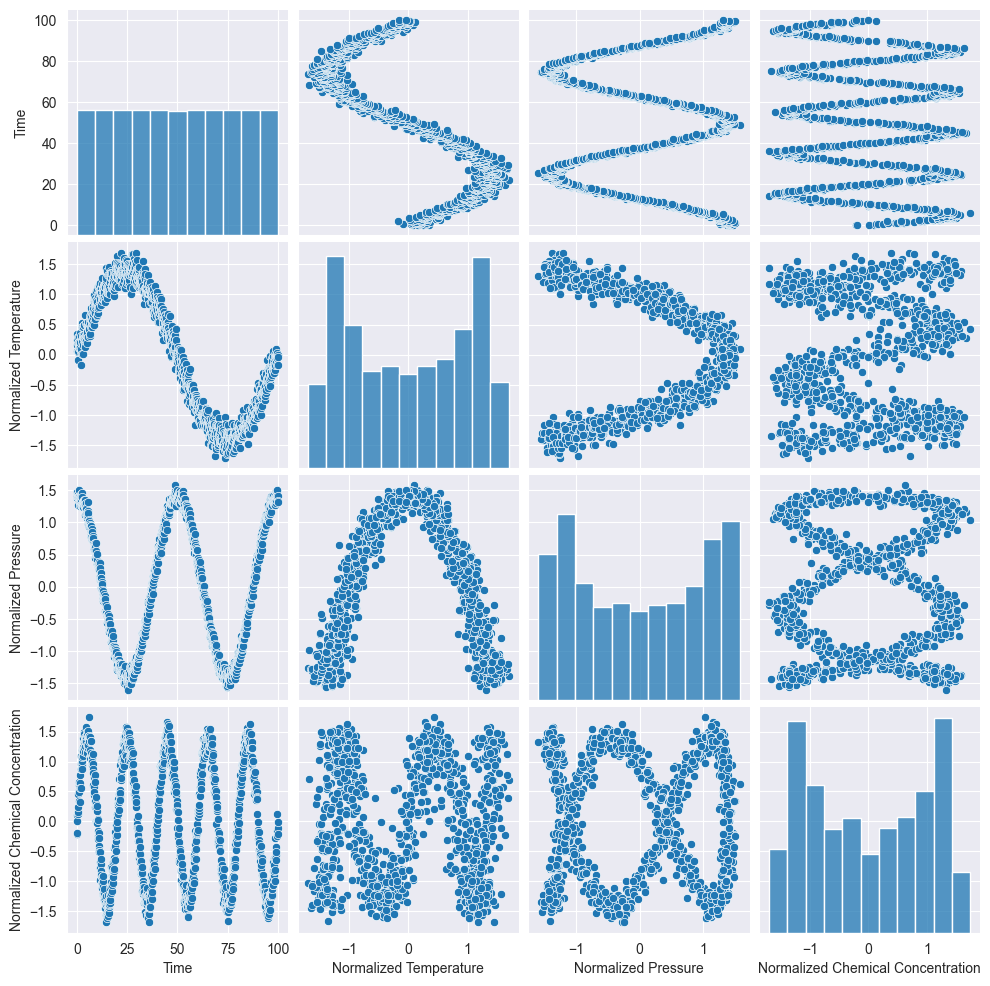

In [13]:
sns.pairplot(data= ninja_data[['Time','Normalized Temperature','Normalized Pressure','Normalized Chemical Concentration']])

In [14]:
import scipy.stats as stats
temperature = ninja_data['Temperature']
pressure = ninja_data['Pressure']
correlation, p_value = stats.pearsonr(temperature, pressure)
print("\nCorrelation between Temperature and Pressure:", correlation)
print("p-value:", p_value)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation between Temperature and Pressure: 0.007112292067251713
p-value: 0.8222655963580454
The correlation is not statistically significant.


In [15]:
import scipy.stats as stats
temperature = ninja_data['Temperature']
chem = ninja_data['Chemical Concentration']
correlation, p_value = stats.pearsonr(temperature, chem)
print("\nCorrelation between Temperature and Chemical Concentration:", correlation)
print("p-value:", p_value)
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")


Correlation between Temperature and Chemical Concentration: -0.0032770701660484007
p-value: 0.9175655752792319
The correlation is not statistically significant.


In [16]:
temperature_fft = np.fft.fft(ninja_data['Temperature'])
pressure_fft = np.fft.fft(ninja_data['Pressure'])
chemical_concentration_fft = np.fft.fft(ninja_data['Chemical Concentration'])

In [17]:
ninja_data['Temperature'] = np.fft.fft(ninja_data['Temperature'])
ninja_data['Pressure'] = np.fft.fft(ninja_data['Pressure'])
ninja_data['Chemical Concentration'] = np.fft.fft(ninja_data['Chemical Concentration'])

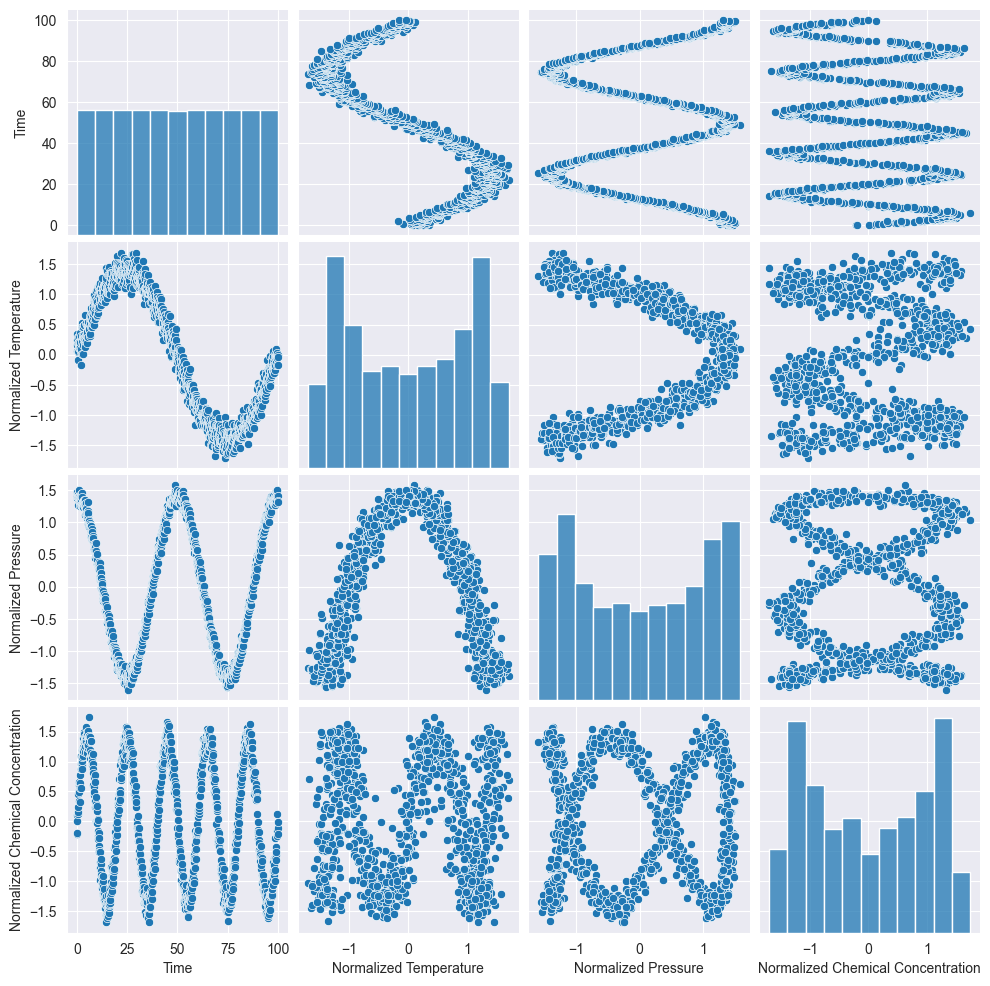

In [18]:
sns.pairplot(data= ninja_data[['Time','Normalized Temperature','Normalized Pressure','Normalized Chemical Concentration']])

In [19]:
print("Data type of 'Time':", ninja_data['Time'].dtype)
print("Data type of 'Pressure':", ninja_data['Pressure'].dtype)
print("Data type of 'Temperature':", ninja_data['Temperature'].dtype)
print("Data type of 'Chemical Concentration':", ninja_data['Chemical Concentration'].dtype)


Data type of 'Time': float64
Data type of 'Pressure': complex128
Data type of 'Temperature': complex128
Data type of 'Chemical Concentration': complex128
